<header style="background-color: rgb(0, 62, 92); color: white; margin-top: 20px; padding:28px; ">
  <img src="Xlogo.png" alt="Transposition of a vector" title="Vector transposition" width="115" style="float: left;">
  <p style=" text-align: center; font-size: 32px;">   
  <strong> Prédiction de prix de BITCOIN avec Deep Learning  </strong></p>
  <p style=" text-align: center; font-size: 25px;"><strong> </strong></p>
  <p style=" text-align: center; font-size: 20px;">YELPOUGDOU INOUSSA   </p>
</header>

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import tensorflow as tf

from keras.models import Sequential
from keras.layers import Dense, SimpleRNN, Dropout, LSTM
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn.metrics import mean_absolute_error, mean_squared_error, mean_absolute_percentage_error

# Introduction:

La cryptomonnaie est devenue un sujet crucial dans le monde des investissements car les fluctuations constantes de ces devises numériques ont rendu difficile la tâche des traders pour prendre des décisions éclairées sur l'achat ou la vente de ces actifs, si bien que la prédiction des prix des cryptomonnaies est une question qui préoccupe beaucoup les investisseurs. La technologie de Deep Learning est une approche prometteuse pour résoudre ce problème et prédire avec précision le prix des cryptomonnaies.

Dans le cadre de notre projet de prédiction de cryptomonnaies, nous avons utilisé des méthodes de Deep Learning pour prédire le prix du Bitcoin. Notre objectif était de créer un modèle de prédiction robuste qui pourrait prédire avec précision le prix futur du Bitcoin en utilisant les données historiques de la cryptomonnaie.

Nos modèles utilisent plusieurs architectures de réseaux de neurones (LSTM, Conv1D, N-BEATS) qui sont des architectures de réseau de neurones capable de traiter et de prédire des séquences de données complexes. Nous avons formé notre modèle en utilisant des données historiques du prix du Bitcoin et avons testé son efficacité en utilisant des données en temps réel.

Méthodes de prédictions des crytomonnaies

Il existe plusieurs approches pour prédire le prix des crypto monnaies, notamment l'analyse technique, l'analyse fondamentale, l'apprentissage automatique et le Deep Learning. L'analyse technique consiste à étudier les graphiques de prix passés pour identifier des tendances et des modèles qui pourraient indiquer les mouvements futurs des prix. L'analyse fondamentale, quant à elle, consiste à étudier les fondamentaux économiques de la cryptomonnaie, tels que les facteurs économiques, politiques et sociaux, pour déterminer la valeur fondamentale de la cryptomonnaie.

L'apprentissage automatique et le Deep Learning sont des approches plus avancées pour prédire le prix des crypto monnaies. L'apprentissage automatique utilise des algorithmes d'apprentissage pour analyser les données historiques et identifier des modèles qui peuvent être utilisés pour prédire le prix futur. Le Deep Learning est une forme avancée d'apprentissage automatique qui utilise des réseaux de neurones artificiels pour apprendre et prédire des séquences de données complexes.

Dans cet projet, nous allons discuter en détail du processus de prédiction du prix des cryptomonnaies en utilisant un modèle de deep learning. Nous allons également explorer les meilleures expériences pour entraîner les modèles de deep learning, ainsi que les techniques d'analyse des données qui peuvent être utilisées pour améliorer la précision de la prédiction des prix.

Nous avons utilisé le Bitcoin qui est la cryptomonnaie de référence sur les marchés financiers . Pour ce faire, nous avons téléchargé le jeu de données historiqes du BTC depuis sa première cotation jusqu'au 12 février 2023.

Sans plus tarder, importons nos données et manipulons les dans le but de prédire le prix du Bitcoin.

In [2]:
bitcoin_price=pd.read_csv('BTC-EUR.csv')

In [3]:
bitcoin_price.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2023-02-22,22942.826172,22972.332031,22263.158203,22807.732422,22807.732422,28475667565
1,2023-02-23,22809.501953,23132.164063,22337.939453,22597.166016,22597.166016,28757798964
2,2023-02-24,22595.763672,22725.429688,21807.943359,21916.640625,21916.640625,25330637326
3,2023-02-25,21918.527344,21926.546875,21623.605469,21920.429688,21920.429688,15228867492
4,2023-02-26,21919.269531,22421.406250,21834.210938,22325.521484,22325.521484,15771595568


# Preprocessing des données

Fonctions de preprocessing des données

Convertion de la colonne date dans la dataframe en type datetime avec pd.to_datetime() : cela permet a pandas de convertir une chaine de caractère censée représenter une date en type DatetimeIndex qui est le format standard de pandas en python pour stocker et manipuler les dates.

Nous allons trier la colonne date par odre croissant depuis le début de la première cotation du BTC jusqu'à maintenant . Cela nous permettra de représenter graphiquement l'évolution du BTC au travers du temps de manière chronologique.

Nous allons fixer la colonne date qui, rappelons le est de type DatetimeIndex en indice. Cela nous permet de retrouver ou d'indexer comme dans Excel une ligne non plus au travers de son numéro mais au travers de la date. Cele nous assure que l'on travaille bien avec une série temporelle et que les données sont bien indexées par le temps. Cela peut etre fait au travers de la fonction nom_du_dataframe.set_index() .

Lorsque nous avons une série temporelle de prix, une étape crucuiale est de définir sa fréquence d'observation. La fréquence peut etre définie comme le nombre d'observation par unité de temps. Vu que le BTC est échangé sur les exchanges et que les exchanges n'ouvrent pas les weeks-ends, il est important de définir une fréquence d'observation des données qui prend en compte les jours de marchés ou non. Dans notre cas, nous avons utilisé une fréquence de de 'B' qui signifie Business Day ( littéralement jour de travail ). 

In [4]:
bitcoin_price.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2023-02-22,22942.826172,22972.332031,22263.158203,22807.732422,22807.732422,28475667565
1,2023-02-23,22809.501953,23132.164063,22337.939453,22597.166016,22597.166016,28757798964
2,2023-02-24,22595.763672,22725.429688,21807.943359,21916.640625,21916.640625,25330637326
3,2023-02-25,21918.527344,21926.546875,21623.605469,21920.429688,21920.429688,15228867492
4,2023-02-26,21919.269531,22421.406250,21834.210938,22325.521484,22325.521484,15771595568


In [5]:
bitcoin_price.tail()

,Date,Open,High,Low,Close,Adj Close,Volume
361,2024-02-18,48401.339844,48429.398438,47016.890625,47938.609375,47938.609375,18566635635
362,2024-02-19,47937.660156,48567.261719,47540.269531,48333.652344,48333.652344,16316334143
363,2024-02-20,48345.027344,48653.566406,47961.472656,48051.406250,48051.406250,19824256609
364,2024-02-21,48050.093750,48954.847656,46978.164063,48367.378906,48367.378906,30854694565
365,2024-02-22,47923.285156,48053.320313,47031.449219,47718.789063,47718.789063,23819526144


Représentation graphique du jeu de données : Comment le bitcoin a évolué depuis le 22-02-2023 jusqu'au 22-02-2024

In [6]:
prix=bitcoin_price["Close"]
dates=bitcoin_price["Date"]

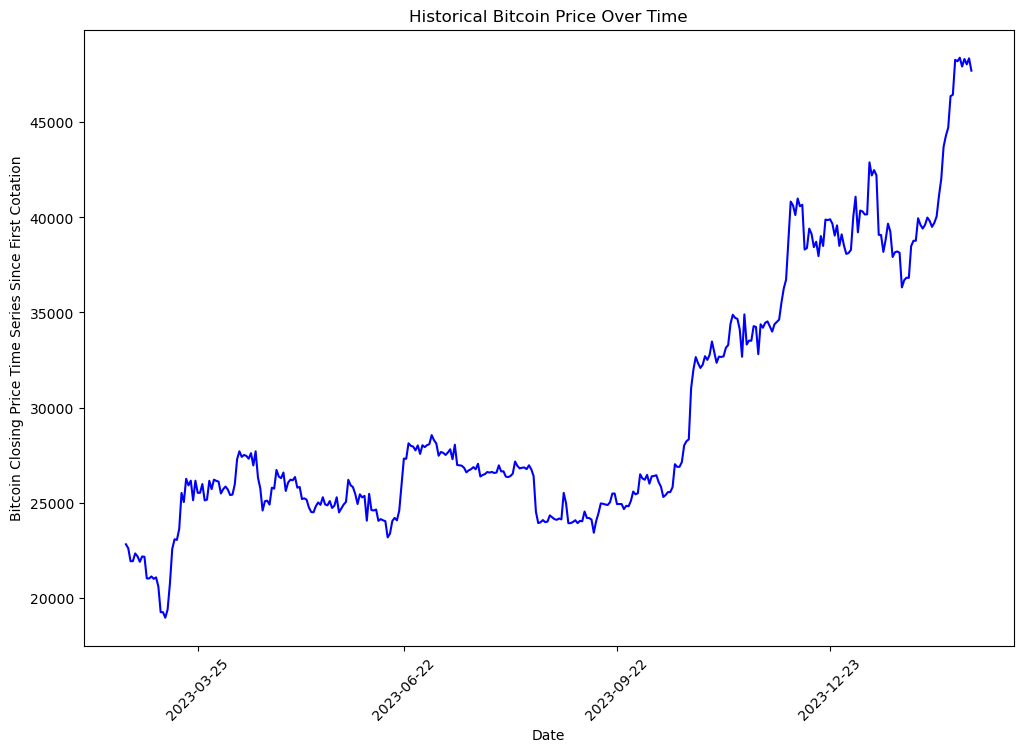

In [7]:
import matplotlib.dates as mdates
fig , ax = plt.subplots(figsize=(12,8))
ax.plot(dates,prix,color='blue')
ax.set_xlabel('Date')
ax.set_ylabel('Bitcoin Closing Price Time Series Since First Cotation')
ax.set_title('Historical Bitcoin Price Over Time')
plt.gca().xaxis.set_major_locator(mdates.MonthLocator(interval=3))  # Affiche une étiquette tous les 3 mois
#plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m'))  # Format simplifié (AAAA-MM)
plt.xticks(rotation=45)
ax.grid(False)
plt.show()

Dans la suite de notre projet, nous allons seulement comme il est de coutume, retenir seulement la colonne Close des données historiques pour effectuer notre modélisation et nos prédictions car cette dernière est pertinente et contient les informations majeures du BTC sur le marché en tant que prix.

In [8]:
bitcoin_price['Date'] = pd.to_datetime(bitcoin_price['Date'])  # convertion de la date en type datetime 

In [9]:
bitcoin_price = bitcoin_price.sort_values('Date',ascending=True) # trie de la colonne date en ordre croissant 

In [10]:
bitcoin_price=bitcoin_price.set_index('Date')

In [11]:
bitcoin_price = bitcoin_price.asfreq('B')

In [12]:
bitcoin_price=bitcoin_price.loc[:,['Close']]

In [13]:
bitcoin_price.head()

,Close
Date,
2023-02-22,22807.732422
2023-02-23,22597.166016
2023-02-24,21916.640625
2023-02-27,22171.482422
2023-02-28,21885.335938


Séparation de la base de données en base d'entrainement et de test

Nous allons tenter de subdiviser notre base de données en base d'entrainement et en base de test. Notre objectif étant de prédire le cours du BTC avec de réseaux de neurones, nous devons pour ce faire subdiviser notre base de donnée en deux :

Une base d'entrainement : C'est la base sur laquelle nous allons entrainer notre modèle de réseaux de neurones. Nous allons faire apprendre a ce dernier a découvrir le type de relations mathématiques, donc de modèle mathémathique qui existe entre le prix du BTC par exemple le huitème jour sur base des 7 derniers jours avant. Autrement dit, on essaie de trouver la relation mathématique au travers d'un réseau de neurones entre le prix observé le 8ième jour de cotation du BTC (ou le 31ième, ou le 41ième, ou le 51ième jour, etc...) et les 7 derniers jours ( ou les 30, 40 ou 50 derniers ) de cotation historique avant. Cette phase est essentiellement une phase de modélisation.

Une base de test : Une fois la relation/l'équation mathématique qui gouverne les prix historiques du BTC est découverte, cette dernière permetterait de prendre historiquement 07 jours observés(ou les 30, ou les 40, ou les 50, etc...) de la base de test du prix du BTC pour prédire le prix du 8ième (ou le 31ième, ou le 41ième, ou le 51ième, etc..) jour correspondant au prix donné par le modèle. Vu que nous travaillons sur des données observées historiquement sur le marché et que de fait nous avons les vrais valeurs, nous allons ainsi quantifier a quel point notre réseau de neurones performe ou pas via des métriques en comparant les résultats que notre modèle nous donne et les observations réalisées sur le marché au travers de la base de test.

Pour subdiviser nos données nous allons prendre 80% des données comme base d'entrainement et 20% des données comme la base de test.

In [14]:
# Convertissons l'indice du BTC et la colonne de prix sous forme de numpy array
timesteps=bitcoin_price.index.to_numpy()
prices=bitcoin_price["Close"].to_numpy()
timesteps[:10], prices[:10]

(array(['2023-02-22T00:00:00.000000000', '2023-02-23T00:00:00.000000000',
        '2023-02-24T00:00:00.000000000', '2023-02-27T00:00:00.000000000',
        '2023-02-28T00:00:00.000000000', '2023-03-01T00:00:00.000000000',
        '2023-03-02T00:00:00.000000000', '2023-03-03T00:00:00.000000000',
        '2023-03-06T00:00:00.000000000', '2023-03-07T00:00:00.000000000'],
       dtype='datetime64[ns]'),
 array([22807.732422, 22597.166016, 21916.640625, 22171.482422,
        21885.335938, 22164.501953, 22150.041016, 21014.589844,
        20988.779297, 21064.697266]))

Code de Subdivision de notre base de données en base de données d'entrainement et de test

In [15]:
split_size = int(0.8 * len(prices))  # 80% pour l'entraînement, 20% pour le test

# Création des données d'entraînement et de test
X_train, y_train = timesteps[:split_size], prices[:split_size]  # 80% des données
X_test, y_test = timesteps[split_size:], prices[split_size:]    # 20% des données restantes

# Afficher les longueurs
len(X_train), len(X_test), len(y_train), len(y_test)


(209, 53, 209, 53)

 Representation graphique de la base d'entrainement et de test 

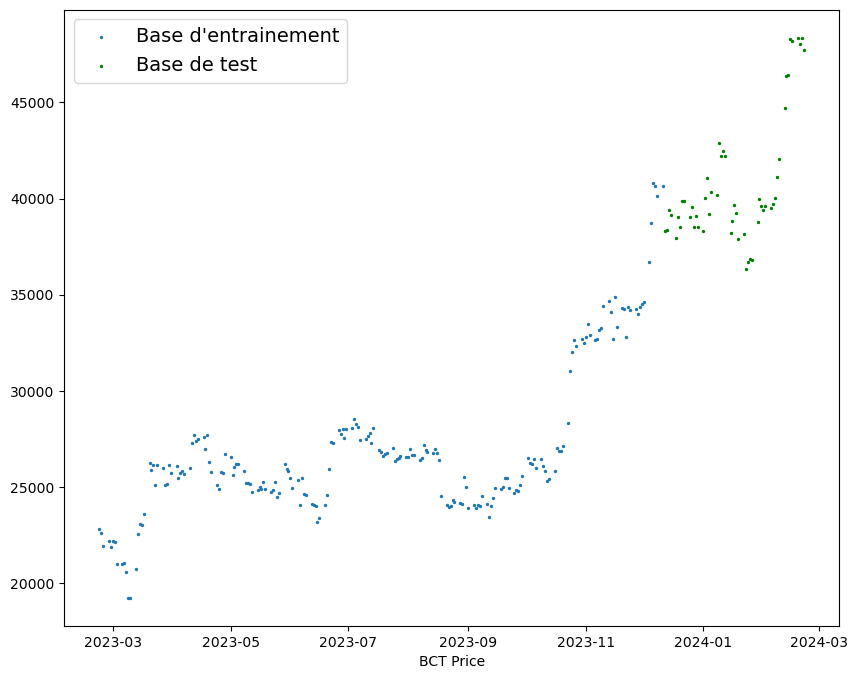

In [16]:
plt.figure(figsize=(10,8))
plt.scatter(X_train,y_train,s=2, label="Base d'entrainement")
plt.scatter(X_test,y_test, s=2,label="Base de test", color='green')
plt.xlabel('Date')
plt.xlabel('BCT Price')
plt.legend(fontsize=14)
plt.grid(False)
plt.show();

Nous allons utilisé un réseau de neurones pour apprendre la relation mathématique sur la partie bleue du graphe et essayer de voir a quel point ce dernier reproduit la partie en vert pour quantifier l'erreur et évaluer le pouvoir prédictif de notre modèle pour pouvoir prédire convenablement le BTC .

Nous allons créer une fonction permettant d'afficher les graphes. Cette dernière nous sera utile car il nous suffira d'appeler cette fonction plutot que de réecrire a chaque fois des lignes de code pour plotter les fonctions et prédictions de nos réseaux de neurones. Cela nous permettra de scaler notre code et gagner en productivité.

In [17]:
def plot_time_series(timesteps, values, format='.', start=0, end=None, color=None ,label=None):
    plt.plot(timesteps[start:end],values[start:end], format, color=color, label=label)
    plt.xlabel('Date')
    plt.ylabel('BTC Price')
    if label:
        plt.legend(fontsize=14)
    plt.grid(False)

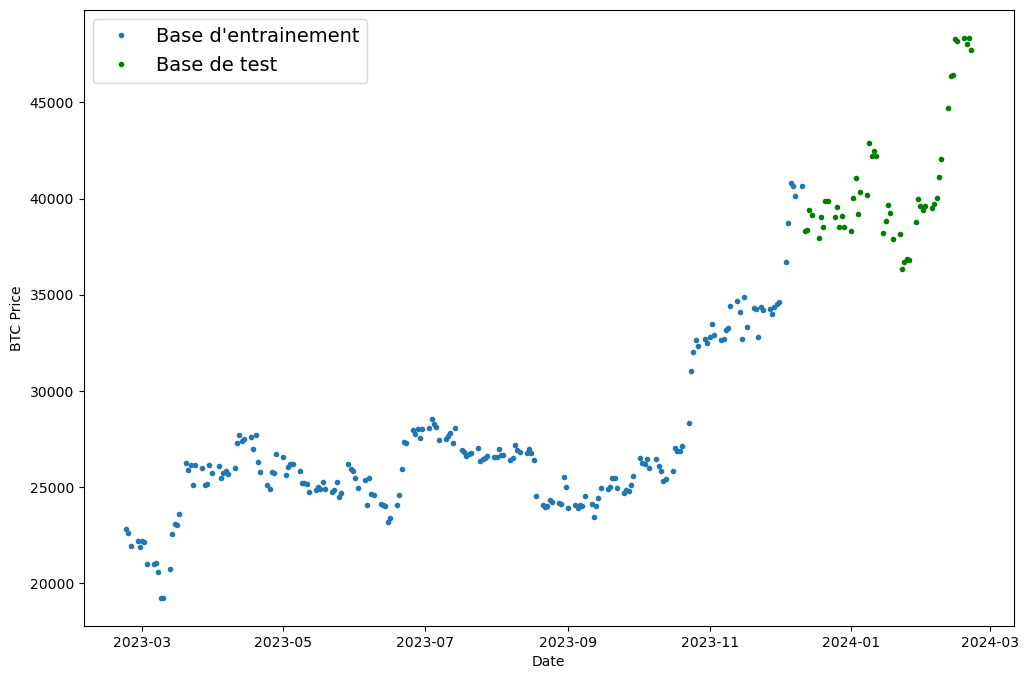

In [18]:
plt.figure(figsize=(12,8))
plot_time_series(timesteps=X_train, values=y_train,label="Base d'entrainement")
plot_time_series(timesteps=X_test,values=y_test,label="Base de test",color ='green')

# STRATÉGIE DE MODÉLISATION ET DE PRÉDICTION DU PRIX DU BTC TOUT AU LONG DE NOTRE PROJET

Notre stratégie de modélisation et de prédicition du prix du BTC se fera comme suit :

               Notre projet se veut avant tout de mettre en lumière une diversité de modèle de deep learning que l'on pourraitutiliser pour prédire le jeu de données du prix du BTC. Puis dans un second temps, nous allons comparer la performance globale de chaque modèle de deep learning sur notre jeu de données tout en prenant également le soin de comparer les prédictions de chaque modèle entre eux. 

Avant d'entrer cependant dans le vif du sujet, il est important de rappeler deux notions qui seront indispensables lors de nos expériences de deep learning:

Le Window : qui représente la fenetre/la quantité de jeu de données historiques que l'on va considérer pour prédire le ième jour correspondant, i étant un jour de cotation du prix du BTC sur le marché. Par exemple, 1 semaine de données pour prédire le 8 ième correspondant, etc....

Le Horizon : qui représente la durée de projection de nos prédictionsdu prix du BTC. Autrement dit, sur quelle période voulons-nous projeter nos prédictions ? 1 jour ? , 2 jours ? , 1 semaine ? , etc....

Si par exemple nous utilisons 7 jours de données du prix du Bitcoin pour prédire le 8ième jour, alors nous dirons que notre Window sera de 7 jours et notre horizon sera de 1 jour. Intuitivement, plus l'horizon de prédictions est grand, moins les valeurs observées seront fiables. Il est plus facile de prédire sur 1 jour le prix du Bitcoin que 1 semaine entière ......            

# Voici comment nous allons procéder globalement pour prédire le prix du __BTC__ dans notre projet :

Dans une première phase, nous allons implémenter plusieurs modèles de DL ayant pour but justement de modéliser notre série temporelle de prix du __BTC__ et comparer leurs performances entre elles via des métriques que nous aurons pris le soin nous meme de recoder ;

Dans une seconde phase, nous allons utiliser tous nos modèles concus pour prédire proprement dit le prix futur du __BTC__ a partir du 13 janvier 2023 et comparer la prédiction de chaque modèle avec les autres et tirer une conclusion globale sur notre proje

Ainsi la toute première partie de notre projet se veut une partie de test et de découverte des modèles de DL que l'on peut utiliser pour tacler ce genre de problèmes. En effet, la première partie aura pour objectif majeur de voir quels sont les possibilités qui nous sont offertes par l'intelligence artificielle pour prédire une série temporelle puis via des métriques, nous allons quantifier la performance de chacun d'eux et leurs validités d'utilisation . La seconde partie se veut une partie de comparaison et de vraisemblance de la prédiction de chaque modèle préalablement concu. Cette dernière nous montrera la capacité que ces modèles ont a imaginer le futur d'un système ouvert comme le __BTC__ .

Sans plus tarder, nous allons passer a notre tout premier modèle.....


# Modèle 0: Le modèle Naif

Le modèle Naif est un modèle qui est très utilisé dans la predictions des series temporelles financières.
 principe est le suivant : La meilleure estimation que l'on a du future est la toute dernière valeur observée sur le marché. Nous allons donc de ce fait, utiliser ce modèle qui représentera notre tout premier pour essayer de prédire le prix du BTC.
 
 
 Mathématiquement cela donne : ât=ât-1

In [19]:
prediction_naive=y_test[:-1] # la prediction naive consiste à prendre toutes les valeurs sauf la dernière


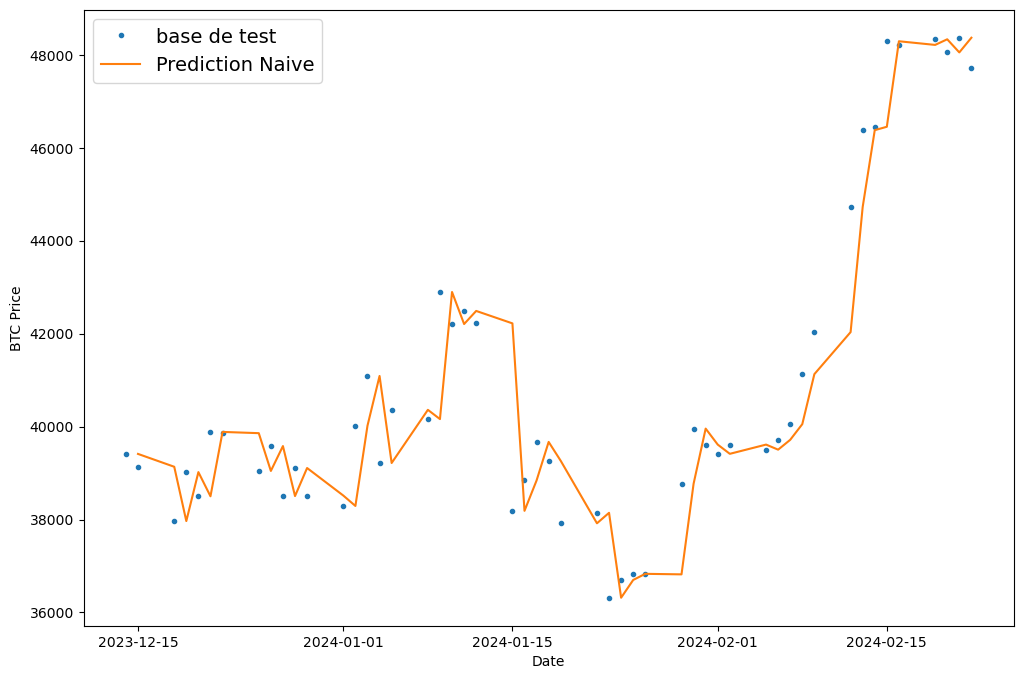

In [20]:
plt.figure(figsize=(12,8))
offset=2
plot_time_series(timesteps=X_test, values=y_test, start=offset,label="base de test" )
plot_time_series(timesteps=X_test[1:], values=prediction_naive,format='-', start=offset, label="Prediction Naive")

# Évaluation de la performance de nos modèles de deep learning

Pour quantifier a quel point nos modèles de deep learning performent, nous devons utiliser pour ce faire des métriques qui quantifient l'erreur de prédictions ou d'apprentissage de nos modèles sur nos données. Vu que nous voulons prédire un nombre, nous faisons donc face a un problème de régression. Par conséquent, nous pouvons utiliser sans crainte, toutes les métriques de performance d'un modèle de régression linéaire. Dans notre projet, nous avons utilisé 05 métriques principales :

Le MAE ou Mean Absolute Error : Facile à interpréter (une prévision diffère de X montant par rapport à la valeur réelle). C'est la moyenne des valeurs absolues de toutes les érreurs de prévisions entre ce qui est réellement observé 
 et ce qui est prédit par le modèle 
.

Le MSE ou Mean Squared Error : C'est la moyenne du carré de toutes les érreurs de prévisions entre ce qui est réellement observé 
 et ce qui est prédit par le modèle 
. Le carré aura tendance a amplifier l'effet des plus grandes erreurs. En effet, si nous avons par exemple, mal nettoyé nos données, un très grand MSE doit attirer notre attention qaunt a la validité d'une telle grande erreur. Mais attention, c'est avec le carré des erreurs que nous interprétons la performance de nos modèles en utilisant le MSE et donc potentiellement la qualité du nettoyage de nos données.

Le RMSE ou Root Mean Squared Error : C'est la racine carrée du MSE. Elle permet donc de ramener les erreurs sur une meme échelle de mésure que les données et donc d'interpréter non plus le carré des erreurs mais bien les erreurs réelles et donc de ne pas biaiser notre analyse.

Le MASE ou Mean Absolute Scaled Error : C'est une métrique utilisée dans les compétitions de prédicition de séries temporelles. Le MASE est égal à 1 pour la prévision naïve (ou très proche de 1). Une prévision qui se comporte mieux que la prévision naïve devrait avoir un MASE inférieur à 1. Comme nous le voyons, le MASE est une mésure qui prend comme benchmark le modèle naif que l'on a précédemment implémenté. En effet, le modèle naif est un modèle très difficile a battre. Pour des systèmes ouverts comme le BTC, nous allons tenter de challenger le modèle naif par d'autres modèles de réseaux de neurones pour voir si ces derniers font mieux ou pas !

Le MAPE ou Mean Absolute Percentage Error : C'est une métrique utilisée dans les compétitions de prédiction de séries temporelles. C'est une métrique qui quantifie le pourcentage de performance que l'on gagne ou l'on perd dans nos différentes prédictions pour etre chirurgical dans ces derniers. Généralement dans les compétitions de prédictions de séries temporelles, cette métrique permet de départager les participants et est la principale pour ne pas dire la seule que les participants tentent de minimiser aux maximum.

Contrairement a toutes les metriques qui sont déjà implémentées sur Tensorflow, le MASE ne l'est pas. Nous avons pris le soin de l'implémenter sur Tensorflow en utilisant exclusivement cette bibliothèque pour éviter les erreurs de typage en Python.

In [21]:
def mean_absolute_scaled_error(y_true, y_pred):
    mae= tf.reduce_mean(tf.abs(y_true-y_pred))
    mae_naive_no_season=tf.reduce_mean(tf.abs(y_true[1:]-y_true[:-1]))
    return mae/mae_naive_no_season

Pour gagner en temps, scaler et faciliter notre analyse, nous allons créer une fonction qui nous retourne toutes les métriques de performance de nos modèles de Deep Learning dont nous aurons besoin. Dans ce projet, nous avons pris le soin de de créer et customiser entièrement nos métriques et modèle de zéro, et de créer des fonctions pythons qui nous permettent justement d'utiliser en une fois, tout ce dont nous aurons besoin.

In [22]:

  

def evaluate_preds(y_true, y_pred):
    y_true = tf.cast(y_true, dtype = tf.float32)
    y_pred = tf.cast(y_pred, dtype = tf.float32)
    
    # Calcul du Mean Absolute Error (MAE)
    mae = mean_absolute_error(y_true, y_pred)

    # Calcul du Mean Squared Error (MSE)
    mse = mean_squared_error(y_true, y_pred)

    # Calcul du Root Mean Squared Error (RMSE)
    rmse = np.sqrt(mse)

    # Calcul du Mean Absolute Percentage Error (MAPE)
    mape = mean_absolute_percentage_error(y_true, y_pred)

    # Calcul du Mean Absolute Scaled Error (MASE)
    mase = mean_absolute_scaled_error(y_true, y_pred)

    return {
        'mae': mae,
        'mse': mse,
        'rmse': rmse,
        'mape': mape,
        'mase': mase.numpy()
    }


En pratique, si nous avons correctement créé la fonction qui calcule le MASE, le modèle naïf devrait obtenir un MASE de 1 (ou très proche de 1). Tout modèle qui se comporte moins bien que la prévision naïve atteindra un MASE supérieur à 1 et tout modèle qui se comporte mieux que la prévision naïve atteindra un MASE inférieur à 1. Testons notre modèle naif sur ces métriques.

In [23]:
resultat_preds_naive=evaluate_preds(y_test[1:],
                                   prediction_naive)
resultat_preds_naive

{'mae': 835.1884,
 'mse': 1350388.6,
 'rmse': 1162.0623,
 'mape': 0.020621018,
 'mase': 0.98243946}

Comment pouvons nous savoir que notre modèle performe bien ou pas ? En la comparant aux performances des autres modèles de DL que l'on va dévélopper pour voir si dans l'optique de faire la meilleure prévision possible, il n'existe pas un autre modèle qui performe nettement mieux que le modèle naif et qui pourrait nous permettre justement de se projeter avec confiance dans le futur et donc de fait de prédire le prix du bitcoin.

Dans le second modèle que nous allons utiliser un jeu de données historique de 1 semaine ou plus pour prédire un jour de BTC price. Donc, notre objectif est d'utiliser une semaine de données ou plus pour prédire 1 jour pour voir si en considérant cette fois un historique de données nous arriverons a performer mieux que le modèle naif et donc par conséquent mieux prédire le prix du BTC.

Nous allons utiliser dans le second modèle un réseau de neurones denses ou encore les Fully-Connected-Neural-Networks. Dans un tel réseau de neurones, tous les neurones sont totalement et intégralement connectés aux autres neurones des autres couches.


Chaque neurone d'une couche est connecté à tous les neurones de la couche précédente : Cela signifie que chaque neurone de la couche cachée reçoit l'entrée de tous les neurones de la couche précédente.
Les poids et les biais : Chaque connexion entre les neurones a un poids qui modifie l'information transmise d'un neurone à un autre. Chaque neurone a également un biais qui ajuste la sortie du neurone.

# Modèle 1 : Window = 7, Horizon = 1

Avant de se lancer immédiatement dans la modélisation par un réseau de neurones de notre jeu de données du BTC, il est important de faire des étapes de préprocessing complets et robustes qui nous faciliterons la tache dans le futur. Il sera important et crucial de répondre a des problématiques fondamentales qui caractérisent nos données.

Le type de solutions que l'on propose : Nous voulons prédire un nombre avons nous dit précedemment. Il s'agit donc d'un problème de régression, donc d'un problème de machine learning supervisé. Or, dans un problème de régression, nous avons une matrice X qui représente l'ensemble des observations et une matrice y qui représente les labels ou résulats afférents aux observations des individus qui représentent chaque ligne de la matrice X.

Comment alors transformer/pré-processer nos données de telle sorte que ces dernières soient compatibles avec un réseau de neurones ? Cette phase est appelée Fenêtrage de notre ensemble de données. C'est le processus par lequel nous allons transformer notre jeu de données séquentielles en données compatibles avec du machine learning supervisé.

Le fenêtrage découpe les données en morceaux de taille fixe.

Chaque fenêtre sert d'entrée au réseau de neurones.

La cible est la valeur à prédire à partir de la fenêtre.

C'est super utile pour les séries temporelles, les signaux, ou toute donnée séquentielle.

# Notre méthode nous assure une chose importante : nous allons pouvoir comparer ce que notre modèle de deep learning nous donne et ce qui a été observé sur le marché. Donc voir a quel point notre modèle de DL peut prédire ce qui s'est déjà réalisé sur le marché.

In [24]:
HORIZON = 1 # horizon de prédiction
WINDOW = 7 # utilisation de 1 semaine de données historiques

In [25]:
def get_labelled_windows(x,horizon=HORIZON):
    return x[:,:-horizon], x[:,-horizon:]

In [26]:
test_window, test_label = get_labelled_windows(tf.expand_dims(tf.range(8)+1, axis=0), horizon=HORIZON)
print(f"Window: {tf.squeeze(test_window).numpy()} -> Label: {tf.squeeze(test_label).numpy()}")

Window: [1 2 3 4 5 6 7] -> Label: 8


Cette fonction est utilisée pour créer des fenêtres à partir d'une séquence de données (comme une série temporelle), en vue de les utiliser pour entraîner un modèle de machine learning.
window_indexes est une matrice où chaque ligne correspond aux indices d'une fenêtre dans la séquence x.


window_step : Crée un tableau d'indices pour une fenêtre.

window_indexes : Génère les indices pour toutes les fenêtres possibles.

windowed_array : Extrait les valeurs de x correspondant à chaque fenêtre.

get_labelled_windows : Sépare les fenêtres en entrées (windows) et étiquettes (labels).

Retourne les fenêtres et les étiquettes.

In [27]:
def make_windows(x, window_size= WINDOW,horizon=HORIZON):
    window_step=np.expand_dims(np.arange(window_size+horizon),axis=0)#np.expand_dims est une fonction qui ajoute une nouvelle dimension à un tableau NumPy
    
    window_indexes=window_step + np.expand_dims(np.arange(len(x)-(window_size+ horizon -1)),axis=0).T
    
    windowed_array=x[window_indexes]
    
    windows,labels=get_labelled_windows(windowed_array,horizon=horizon)
    return windows, labels
    
    

In [28]:
full_windows, full_labels=make_windows(prices, window_size=WINDOW,horizon=HORIZON)
len(full_windows), len(full_labels)

(255, 255)

A cette étape, full_windows et full_labels contiennent les données nécessaires a notre problème. full_windows représente la matrice X et chaque ligne représente 1 semaine de données historique et les full_labels représentent la matrice y et correspondent aux prix observés de 8ième jour correspondant.

In [29]:
full_windows[100:110]

array([[27802.660156, 27279.845703, 28044.089844, 26939.876953,
        26828.544922, 26590.166016, 26696.830078],
       [27279.845703, 28044.089844, 26939.876953, 26828.544922,
        26590.166016, 26696.830078, 26756.269531],
       [28044.089844, 26939.876953, 26828.544922, 26590.166016,
        26696.830078, 26756.269531, 27041.066406],
       [26939.876953, 26828.544922, 26590.166016, 26696.830078,
        26756.269531, 27041.066406, 26373.333984],
       [26828.544922, 26590.166016, 26696.830078, 26756.269531,
        27041.066406, 26373.333984, 26449.912109],
       [26590.166016, 26696.830078, 26756.269531, 27041.066406,
        26373.333984, 26449.912109, 26498.292969],
       [26696.830078, 26756.269531, 27041.066406, 26373.333984,
        26449.912109, 26498.292969, 26607.666016],
       [26756.269531, 27041.066406, 26373.333984, 26449.912109,
        26498.292969, 26607.666016, 26556.158203],
       [27041.066406, 26373.333984, 26449.912109, 26498.292969,
        26607.66

In [30]:
len(full_windows[1])

7

In [31]:
full_labels[100:110]

array([[26756.269531],
       [27041.066406],
       [26373.333984],
       [26449.912109],
       [26498.292969],
       [26607.666016],
       [26556.158203],
       [26580.546875],
       [26958.771484],
       [26638.914063]])

In [32]:
len(full_labels[1])

1

A ce stade de l'exposé, nous tenons a spécifier quelque chose de crucial ! Nous avons entré en paramètre de notre fonction make_windows(), le tableau de prix du __BTC__. Le paramètre x représente dans notre fonction make_windows(), le tableau de prix du BTC converti en numpy_array car numpy est une libraire Python qui est optimisé pour les calculs et la création de tableau. Vu que le deep learning utilise des tenseurs, donc des tableaux multidimenionnels, il est important d'utiliser numpy et d'eviter d'utiliser des boucles pour optimiser le calcul.

In [33]:
(len(prices), 
len(bitcoin_price))

(262, 262)

In [34]:
for i in range(3):
    print(f"window:{full_windows[i]}-->label : {full_labels[i]}")

window:[22807.732422 22597.166016 21916.640625 22171.482422 21885.335938
 22164.501953 22150.041016]-->label : [21014.589844]
window:[22597.166016 21916.640625 22171.482422 21885.335938 22164.501953
 22150.041016 21014.589844]-->label : [20988.779297]
window:[21916.640625 22171.482422 21885.335938 22164.501953 22150.041016
 21014.589844 20988.779297]-->label : [21064.697266]


Notre fonction marche parfaitement. Nous voyons concrètement que notre fenetre (Window) est bien de 7 et notre horizon est d'1 jour. Si par exemple, on voulait un historique données de 50 jours et un horizon de prédiction de 1 mois donc se servir des 50 derniers jours de cotation du Bitcoin pour prédire un mois entier !, il nous suffirait de passer en argument de notre fonction 50 et 30. Cela donnerait :

In [35]:
window_50, horizon_30 = make_windows(prices,window_size=50,horizon=30)
len(window_50),len(horizon_30)

(183, 183)

In [36]:
window_50[:1] 

array([[22807.732422, 22597.166016, 21916.640625, 22171.482422,
        21885.335938, 22164.501953, 22150.041016, 21014.589844,
        20988.779297, 21064.697266, 20587.609375, 19235.703125,
        19235.703125, 20749.800781, 22565.941406, 23069.601563,
        23035.966797, 23604.212891, 26251.658203, 25905.304688,
        26153.638672, 25124.207031, 26151.009766, 25974.146484,
        25114.818359, 25156.841797, 26145.060547, 25708.375   ,
        26103.367188, 25479.769531, 25706.507813, 25843.804688,
        25681.841797, 25962.480469, 27280.267578, 27697.037109,
        27405.621094, 27505.623047, 27598.189453, 26952.845703,
        27696.791016, 26317.671875, 25753.052734, 25101.648438,
        24893.007813, 25785.673828, 25732.861328, 26717.722656,
        26581.580078, 25610.464844]])

Puisque nous travaillons avec des modèles de machine learning, une étape cruciale est donc de séparer nos données en données d'entrainement et en données de test. Cette étape permet de pouvoir quantifier la performance de notre modèle. Mais attention ! Vu que nous travaillons avec des données séquentielles, utiliser la fonction habituelle de train_test_split en Python s'avère fallacieux. En effet, bien que nous ayons représenté sous forme de matrice X et y la série temporelle des données, nous devons garder en tete que nous travaillons avec des données séquentielles et donc par conséquent les subdiviser de manière temporelle en deux jeux de données :

Un jeu de données d'entrainement : qui va représenter notre historique sur lequel va s'entrainer notre modèle

Une jeu de données de test qui représente le pseudo-futur avec lequel on va comparer le futur donné par notre modèle ( ce a quoi va ressembler le Bitcoin dans le futur selon le modèle ) et le pseudo-futur ( ce qui s'est vraiment réalisé sur les marchés ) du jeu de test.

L'idée est simple. On se place dans un environnement comme si on a une matrice X et des labels y. Vu que ces matrices sont le résultats d'une série temporelle donc de données séquentielles, nous devons créer une fonction de splitting des données de telle sorte a conserver l'ordre chronologique du temps ! Tout comme un modèle de machine learning ordinaire, mais sauf que ici on split les données de manière séquentielle sur base de la matrice X et y.

In [37]:
def make_train_test_split(windows,labels,test_split=0.2):
    
    split_size=int(len(windows)*(1-test_split))
    train_windows=windows[:split_size]
    train_labels=labels[:split_size]
    
    test_windows=windows[split_size:]
    test_labels=labels[split_size:]
    return train_windows,test_windows,train_labels,test_labels

In [38]:
train_windows, test_windows, train_labels,test_labels=make_train_test_split(full_windows,full_labels)
len(train_windows), len(test_windows),len(train_labels), len(test_labels)

(204, 51, 204, 51)

Notre fonction prend en entrée les matrices X (full_windows) et y (full_labels), elles memes obtenues via une fonction sur notre série temporelle de prix.

Il est temps de passer a la modélisation de nos données par un réseau de neurones. Mais avant cela, il est important de vérifier une dernière chose indispensable a notre modélisation et dans l'étape de pré-processing.

# Tracking des checkpoints de notre modèle de Deep Learning

Comme les performances de notre modèle fluctueront d'une expérience à l'autre, nous voudrons nous assurer que nous comparons des pommes avec des pommes.

Ce que nous voulons dire par là, c'est que pour une comparaison équitable, nous voulons comparer les meilleures performances de chaque modèle que l'on cosntruira entre elles.

Par exemple, si le modèle_1 a très bien performé à l'itération 55 mais que ses performances ont diminué vers l'itération 100, nous voulons que la version du modèle de l'itération 55 soit comparée à d'autres modèles plutôt que la version du modèle de l'itération 100.

Et la même chose s'applique à chacun de nos autres modèles : comparer les meilleurs contre les meilleurs.

Pour cela, nous allons mettre en place un rappel (callback) ModelCheckpoint en Tensorflow.

Le callback ModelCheckpoint surveillera les performances de notre modèle pendant l'entraînement et sauvegardera le meilleur modèle dans un fichier en définissant le paramètre save_best_only=True.

Ainsi, lors de l'évaluation de notre modèle, nous pourrons restaurer sa configuration de meilleure performance à partir du fichier.

Comme nous allons exécuter plusieurs expériences, il est judicieux de les suivre en enregistrant les modèles dans des fichiers sous des noms différents.

Pour cela, nous allons écrire une petite fonction pour créer un callback ModelCheckpoint qui enregistre un modèle dans un fichier spécifié par son nom de fichier.

In [39]:
import os
import tensorflow as tf

def create_model_checkpoint(model_name, save_path='model_experiments'):
    # Vérifie si le dossier existe, sinon le crée
    if not os.path.exists(save_path):
        os.makedirs(save_path)
    # Ajoute l'extension .keras à la sauvegarde du modèle
    return tf.keras.callbacks.ModelCheckpoint(
        filepath=os.path.join(save_path, model_name + ".keras"),  # Ajouter ".keras"
        verbose=0,
        save_best_only=True
    )

# Model 1 : Réseaux de neurones Dense ( window=7, horizon=1 )

Voici les caractéristiques de notre premier modèle de DL:

Une seule couche dense avec 128 unités cachées et une activation ReLU (Rectified Linear Unit).
Une couche de sortie avec une activation linéaire (ou sans activation).
L'optimiseur Adam et la fonction de perte MAE (erreur absolue moyenne).
Taille de lot (batch size) de 128.
100 epochs

In [40]:
from tensorflow.keras import layers

tf.random.set_seed(42)

modele_1=tf.keras.Sequential([
    layers.Dense(128,activation='relu'),
    layers.Dense(HORIZON, activation='linear')
    
],name="modele_1_dense")


modele_1.compile(loss='mae',
                optimizer=tf.keras.optimizers.Adam(),
                metrics=["mae"])


modele_1.fit(x=train_windows,
            y=train_labels,
            epochs=100,
            verbose=1,
            batch_size=128,
            validation_data=(test_windows,test_labels),
            callbacks=[create_model_checkpoint(model_name=modele_1.name)]
            )


Epoch 1/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 3s 463ms/step - loss: 38668.1562 - mae: 38668.1562 - val_loss: 53020.6797 - val_mae: 53020.6797
Epoch 2/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 79ms/step - loss: 34863.7305 - mae: 34863.7305 - val_loss: 47291.0898 - val_mae: 47291.0898
Epoch 3/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 105ms/step - loss: 31015.1738 - mae: 31015.1738 - val_loss: 41560.2812 - val_mae: 41560.2812
Epoch 4/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 83ms/step - loss: 27182.7344 - mae: 27182.7344 - val_loss: 35845.7812 - val_mae: 35845.7812
Epoch 5/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 93ms/step - loss: 23359.4355 - mae: 23359.4355 - val_loss: 30120.4414 - val_mae: 30120.4414
Epoch 6/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 88ms/step - loss: 19527.9473 - mae: 19527.9473 - val_loss: 24408.2812 - val_mae: 24408.2812
Epoch 7/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 93ms/step - loss: 15709.6602 - mae: 15709.6602 - val_loss: 18732.1074 - val_mae: 18732.1074
Epoch 8/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 120ms/step - loss: 11911.9004 - ma

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 203ms/step - loss: 946.3903 - mae: 946.3903 - val_loss: 1720.6743 - val_mae: 1720.6743
Epoch 52/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 64ms/step - loss: 950.2925 - mae: 950.2925 - val_loss: 1707.5344 - val_mae: 1707.5344
Epoch 53/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 61ms/step - loss: 954.3115 - mae: 954.3115 - val_loss: 1704.5291 - val_mae: 1704.5291
Epoch 54/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 62ms/step - loss: 954.0541 - mae: 954.0541 - val_loss: 1709.8875 - val_mae: 1709.8875
Epoch 55/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 59ms/step - loss: 950.3332 - mae: 950.3332 - val_loss: 1719.2626 - val_mae: 1719.2626
Epoch 56/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 62ms/step - loss: 945.5503 - mae: 945.5503 - val_loss: 1728.3743 - val_mae: 1728.3743
Epoch 57/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 61ms/step - loss: 942.2019 - mae: 942.2019 - val_loss: 1724.2175 - val_mae: 1724.2175
Epoch 58/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 60ms/step - loss: 940.4488 - mae: 940.4488 - val_loss: 1710.4918 - val_mae: 1710.4

Évaluons la performance de notre modèle. Pour ce faire, nous allons ré-importer l'itération pour laquelle notre modèle performe le plus. Nous remarquons que notre modèle a un MAE de 1062.3967. Un modèle de DL qui utilise 7 jours de données historiques pour prédire 1 jour fait moins bien que notre modèle naif qui suppose que la meilleure estimation des observations futures est la toute dernière.

Mais comment réellement comparer la vraie performance de notre modèle ? Pour ce faire, nous allons utiliser notre fonction customisée de calcul des 05 métrics indispensables pour la prédiction de nos données. Vu que notre fonction de calcul des métriques prend en entrée les prédictions des valeurs par notre modèle de DL, nous allons écrire une fonction qui, pour toutes nos autres expériences nous servira de base de prédictions de valeurs futures.

Cette fonction :

Prends un modèle entraîné (comme model_1)
Prends des données d'entrée (comme celles sur lesquelles le modèle a été entraîné)
Passe ces données d'entrée à la méthode predict() du modèle
et retourne la prédiction.

In [41]:
model_1 = tf.keras.models.load_model("model_experiments/modele_1_dense.keras")

model_1.evaluate(test_windows,test_labels)

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 1507.8333 - mae: 1507.8333  


[1608.6077880859375, 1608.6077880859375]

In [42]:
"""
tf.squeeze(x):
Cette fonction supprime les dimensions de taille 1 dans le tenseur de sortie.

Exemple : Si x a la forme (n_samples, 1), alors tf.squeeze le transforme en (n_samples).
Cela rend le résultat plus facile à manipuler et à lire.
Pourquoi tf.squeeze?

Cela est utile si tu as un modèle qui retourne une sortie avec une dimension superflue (par exemple, [10, 1]au lieu de [10]). 
Cela rend les résultats plus clairs et plus cohérents.
"""

def make_preds(model, input_data):
    model_pr=model.predict(input_data)
    
    return tf.squeeze(model_pr)

In [43]:
model_1_preds=make_preds(model_1,test_windows)

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 57ms/step


Une fois les prédictions faites par notre modèle, il est temps de comparer ce que notre modèle nous donne et ce qui s'est réellement passé. Donc, calculons les métriques de performance de notre modèle en utilisant notre fonction auparavant implémentée.

In [44]:
model_1_metrics=evaluate_preds(y_true=tf.squeeze(test_labels),y_pred=model_1_preds)
model_1_metrics

{'mae': 1608.6078,
 'mse': 4153095.0,
 'rmse': 2037.9144,
 'mape': 0.038653784,
 'mase': 1.9001048}

Ci-joint un résumé final de la performance de nosdeux premiers modèles quant à leurs exactitudes sur leurs capacités prédictives :

In [45]:
list_of_dict=[resultat_preds_naive,model_1_metrics]

In [46]:
pd.DataFrame(list_of_dict,index=['Modèle naif', 'Modèle dense (window=7, horizon=1)'])

,mae,mse,rmse,mape,mase
Modèle naif,835.188416,1350388.625,1162.062256,0.020621,0.982439
"Modèle dense (window=7, horizon=1)",1608.607788,4153095.000,2037.914429,0.038654,1.900105


Il semblerait que le modèle naif bat dans tous les compartiments notre modèle de réseaux de neurones denses. Comme nous le disions auparavant, ce modèle est très difficile a battre de constitue de fait, un benchmark solide sur lequel durant tout notre projet, nous allons baser nos scores et faire des prédictions. Avant cependant de passer au second modèle que l'on veut tester, il est important de **visualiser** ce que nous donne notre modèle de réseaux de neurones denses !

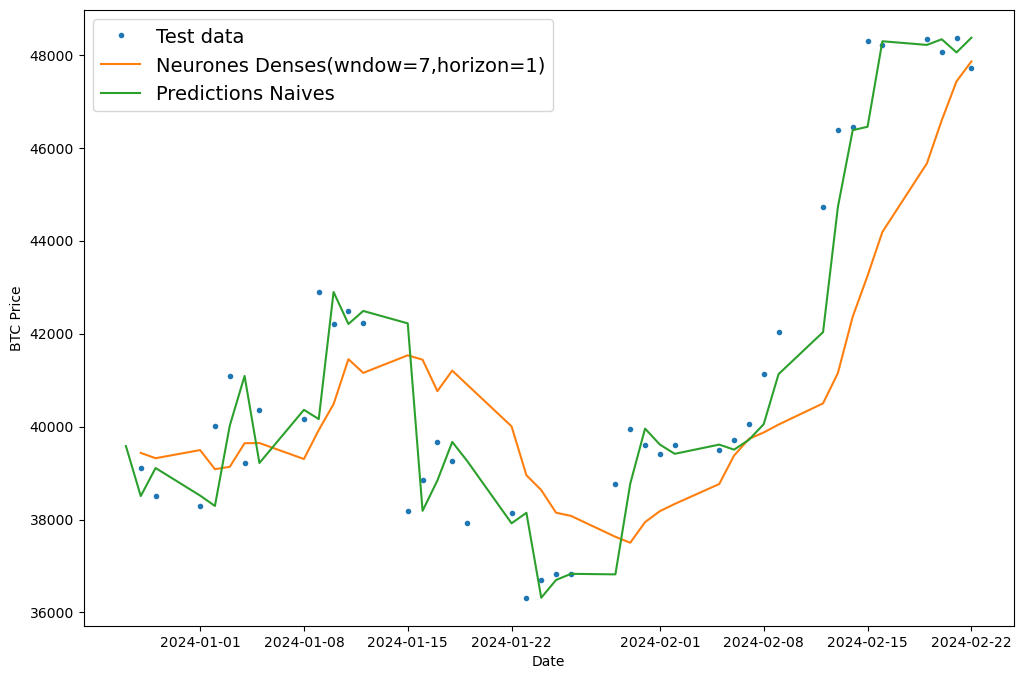

In [47]:
offset=10
plt.figure(figsize=(12,8))
plot_time_series(timesteps=X_test[-len(test_windows):],values=test_labels[:,0],start=offset,label="Test data")
plot_time_series(timesteps=X_test[-len(test_windows):],values=model_1_preds,start=offset,format="-",label="Neurones Denses(wndow=7,horizon=1)")
plot_time_series(timesteps=X_test[1:], values=prediction_naive, format="-",start=offset,label="Predictions Naives")

 Notons que ces prédictions sont seulement sur le jeu de test ! Ce ne sont pas les vrais prédictions ou prédictions actuelles concernant le vrai futur de notre modèle et ce a quoi ressemblerait le __BTC__ en 2023. Ces prédictions ont pour but de **seulement** quantifier la performance de notre modèle. Nous verrons plus tard les prédictions réelles de **tous nos modèles**, et nous allons les comparer.

Un modèle de réseaux de neurones denses sur 1 semaine et 1 jour fait moins bien que le modèle naif en terme de précision et de métriques, et si nos données historiques n'étaient pas suffisantes ? Autrement dit, plutot que de prendre 1 semaine de jeu de données de __BTC__, et si l'on prenait 30 jours , donc 1 mois de données hostorique ?

# Modèle 2 : Réseaux de neurones dense ( window=30, horizon=1)

Nous allons cette fois ci utiliser une plus grande base de données historiques pour prédire le prix du __BTC__. En effet, intuitivement, en utilisant une plus grande base de données historiques, nous nous attendons a ce que ce nouveau modèle de DL performe mieux que le précédent de 7 jours et 1 jour car elle dispose de plus de données historiques pour la modélisation. 

Les fonction précédemment développées nous permettront de gagner cette fois-ci un temps É-norme dans l'implémentation de ce nouveau modèle. En effet, nous disposons de toutes les fonctions nécessaires a l'établissement d'un nouveau modèle de DL, ce qui nous permet de passer rapidement a la phase de modélisation et de scaler notre code. Nos fonctions de pré-processing nous seront utiles dans tout notre projet, et nous éviterons de ré-écrire le meme code encore et encore. Passons sans plus tarder au second modèle de DL. 

 >Comme précédemment, nous devons avoir la matrice X et y

In [48]:
HORIZON=1
WINDOW=30

In [49]:
full_windows,full_labels =make_windows(prices, window_size=WINDOW, horizon=HORIZON)
len(full_windows),len(full_labels)

(232, 232)

> Splitting des données d'entrainement et de test

In [50]:
train_windows, test_windows, train_labels, test_labels = make_train_test_split(windows=full_windows, labels=full_labels)
len(train_windows), len(test_windows), len(train_labels), len(test_labels)

(185, 47, 185, 47)

>Nos données sont prêtes pour l'utilisation! Passons a la modelisation

In [51]:
tf.random.set_seed(42)

# Création du second modèle ayant exactement la meme architecture que le premier 
model_2 = tf.keras.Sequential([
  layers.Dense(128, activation="relu"),
  layers.Dense(HORIZON) 
], name="model_2_dense")

model_2.compile(loss="mae",
                optimizer=tf.keras.optimizers.Adam())

model_2.fit(train_windows,
            train_labels,
            epochs=100,
            batch_size=128,
            verbose=0,
            validation_data=(test_windows, test_labels),
            callbacks=[create_model_checkpoint(model_name=model_2.name)])

Verifions sa performance sur la meilleure iteratin sauvegardée

In [52]:
model_2 = tf.keras.models.load_model("model_experiments/model_2_dense.keras")
model_2.evaluate(test_windows, test_labels)

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 1936.9590 


2055.835693359375

In [53]:
model_2_preds=make_preds(model_2,input_data=test_windows)

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 63ms/step


In [54]:
model_2_metrics= evaluate_preds(y_true=tf.squeeze(test_labels),
                               y_pred=model_2_preds)
model_2_metrics

{'mae': 2055.8354,
 'mse': 6404762.0,
 'rmse': 2530.7632,
 'mape': 0.049490567,
 'mase': 2.405654}

In [55]:
list_of_dict = [resultat_preds_naive,model_1_metrics,model_2_metrics]

In [56]:
pd.DataFrame(list_of_dict,index=['Modèle naif',
                                 'Modèle dense (window=7, horizon=1)',
                                 'Modèle dense (window=30, horizon=1)'])

,mae,mse,rmse,mape,mase
Modèle naif,835.188416,1350388.625,1162.062256,0.020621,0.982439
"Modèle dense (window=7, horizon=1)",1608.607788,4153095.000,2037.914429,0.038654,1.900105
"Modèle dense (window=30, horizon=1)",2055.835449,6404762.000,2530.763184,0.049491,2.405654


Le modèle dense de 30 jours de données historiques et 1 jour de prédiction fait moins bien que le modèle de 7 jours qui lui meme fait moins bien que le modèle naif. Par conséquent, avoir un plus grand jeu de données historiques n'améliore pas la capacité que l'on a à prédire le prix du __BTC__ selon les modèles de deep learning.  

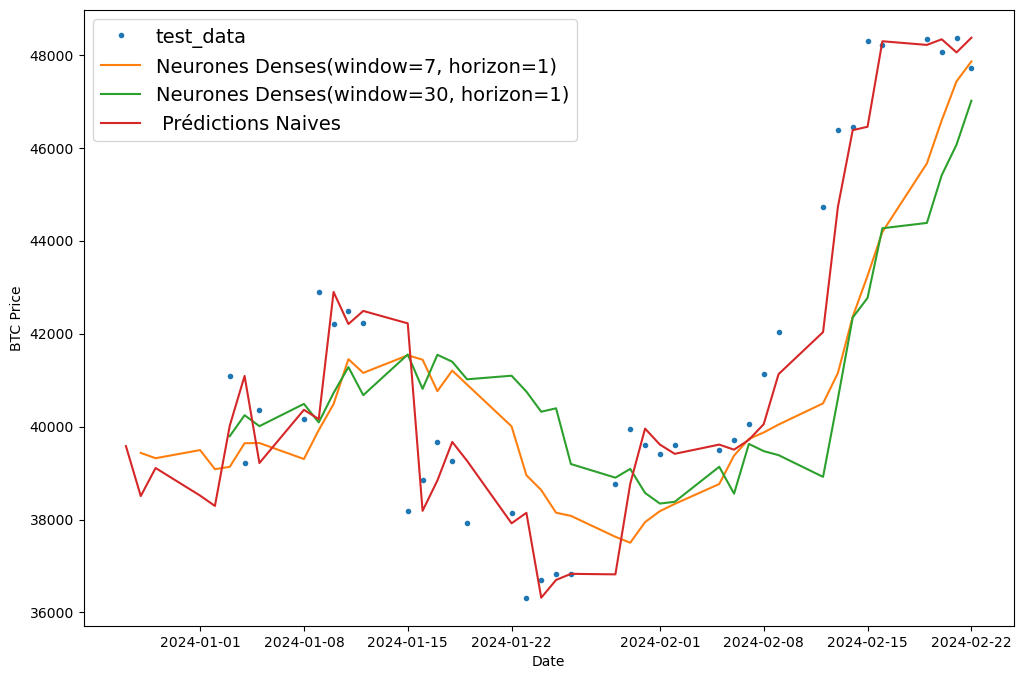

In [57]:
offset = 10
plt.figure(figsize=(12, 8))
plot_time_series(timesteps=X_test[-len(test_windows):], values=test_labels[:, 0], start=offset, label="test_data")
plot_time_series(timesteps=X_test[-len(test_windows)-4:], values=model_1_preds, start=offset, format="-", label="Neurones Denses(window=7, horizon=1)")
plot_time_series(timesteps=X_test[-len(test_windows):], values=model_2_preds, start=offset, format="-", label="Neurones Denses(window=30, horizon=1)")
plot_time_series(timesteps=X_test[1:], values=prediction_naive, format="-", start=offset, label=" Prédictions Naives")

# Modèle 3 : Réseaux de neurones convolutionnels : Conv1D ( window=7, horizon=1)

Nous allons dans cette partie, nous allons utiliser les réseaux de neurones **séquentiel** pour éssayer de prédire le cours du __BTC__. Ce qui justifie ce choix est la forme première des données. Vu que nous sommes en présence de données séquentielles, utiliser un modèle de réseaux de neurones séquentiel ou **seq2seq** pour prédire la **suite de la séquence d'observation de prix que nous avons** savère judicieux et peut nous permettre en conséquence d'améliorer drastiquement les performances de notre modèle. 

Les réseaux de neurones convolutionnels sont de base utilisé pour prédire le **computer vision** ou les images. Cependant, les réseaux de neurones convolutionnels peuvent etre utilisé pour prédire des **séquences**. La seule différence est la dimension du réseau de neurones. Pour prédire une séquence, on utilise un réseau de neurones convolutionnel a 1 dimension d'ou le terme **conv1D** alors que pour prédire des images, on utilise un réseau de neurones convolutionnels a deux dimensions d'ou le terme **conv2D**. Nous allons essayer de voir a quel point un réseau convolutionnel 1 dimension est performant pour prédire notre jeu de données.

In [58]:
HORIZON = 1 
WINDOW = 7 

In [59]:
full_windows, full_labels = make_windows(prices, window_size=WINDOW, horizon=HORIZON)
len(full_windows), len(full_labels)

(255, 255)

In [60]:
train_windows, test_windows, train_labels, test_labels = make_train_test_split(full_windows, full_labels)
len(train_windows), len(test_windows), len(train_labels), len(test_labels)

(204, 51, 204, 51)

In [61]:
train_windows[0].shape

(7,)

Avant de faire entrer la donnée dans un réseau de neurones récurrents, nous devons nous assurer que la dimension des tenseurs coincident parfaitement auquel car Tensorflow va nous retourner des erreurs de dimension et ne pourra pas compiler le modèle. Pour tout modèle de réseaux de neurones récurrents, cela est une étape indispensable.

In [62]:
x= tf.constant(train_windows[0])
expand_dims_layer= layers.Lambda(lambda x:tf.expand_dims(x,axis=1))

In [72]:
tf.random.set_seed(42)


def expand_input(x):
    return tf.expand_dims(x, axis=1)"""permet d'ajouter une nouvelle dimension"""

model_3 = tf.keras.Sequential([
    layers.Lambda(expand_input),  # 
    layers.Conv1D(filters=128, kernel_size=5, padding="causal", activation="relu"),
    layers.Dense(HORIZON)
], name="model_3_conv1D")

model_3.compile(loss="mae",
                optimizer=tf.keras.optimizers.Adam())


model_3.fit(train_windows,
            train_labels,
            batch_size=128, 
            epochs=100,
            verbose=0,
            validation_data=(test_windows, test_labels),
            callbacks=[create_model_checkpoint(model_name=model_3.name)])

In [73]:
model_3.summary()

Model: "model_3_conv1D"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ lambda_5 (Lambda)               │ (None, 1, 7)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv1d_3 (Conv1D)               │ (None, 1, 128)         │         4,608 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_7 (Dense)                 │ (None, 1, 1)           │           129 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 14,213 (55.52 KB)

 Trainable params: 4,737 (18.50 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 9,476 (37.02 KB)

In [76]:
from keras.saving import register_keras_serializable

@register_keras_serializable()
def expand_input(x):
    return tf.expand_dims(x, axis=1)


model_3 = tf.keras.models.load_model("model_experiments/model_3_conv1D.keras")
model_3.evaluate(test_windows, test_labels)

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - loss: 1472.1691 


1565.4962158203125

In [77]:
model_3_preds = make_preds(model_3, test_windows)
model_3_preds[:10]

1/2 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/stepWARNING:tensorflow:6 out of the last 6 calls to <function TensorFlowTrainer.make_predict_function.<locals>.one_step_on_data_distributed at 0x000001A717D9F240> triggered tf.function retracing. Tracing is expensive and the excessive number of tracings could be due to (1) creating @tf.function repeatedly in a loop, (2) passing tensors with different shapes, (3) passing Python objects instead of tensors. For (1), please define your @tf.function outside of the loop. For (2), @tf.function has reduce_retracing=True option that can avoid unnecessary retracing. For (3), please refer to https://www.tensorflow.org/guide/function#controlling_retracing and https://www.tensorflow.org/api_docs/python/tf/function for  more details.
2/2 ━━━━━━━━━━━━━━━━━━━━ 1s 172ms/step


<tf.Tensor: shape=(10,), dtype=float32, numpy=
array([39671.098, 39926.535, 39650.45 , 39398.723, 39211.723, 38839.777,
       39052.527, 39474.125, 39274.68 , 39347.594], dtype=float32)>

In [80]:
model_3_metrics = evaluate_preds(y_true=tf.squeeze(test_labels),
                                 y_pred=model_3_preds)
model_3_metrics

{'mae': 1565.4962,
 'mse': 3918349.2,
 'rmse': 1979.482,
 'mape': 0.03765629,
 'mase': 1.8491809}

In [81]:
list_of_dict = [resultat_preds_naive,model_1_metrics,model_2_metrics,model_3_metrics]

In [82]:
pd.DataFrame(list_of_dict,index=['Modèle naif',
                                 'Modèle dense (window=7, horizon=1)',
                                 'Modèle dense (window=30, horizon=1)',
                                 'Modèle Conv1D (window=7, horizon=1)'])

,mae,mse,rmse,mape,mase
Modèle naif,835.188416,1350388.625,1162.062256,0.020621,0.982439
"Modèle dense (window=7, horizon=1)",1608.607788,4153095.000,2037.914429,0.038654,1.900105
"Modèle dense (window=30, horizon=1)",2055.835449,6404762.000,2530.763184,0.049491,2.405654
"Modèle Conv1D (window=7, horizon=1)",1565.496216,3918349.250,1979.482056,0.037656,1.849181


Nous voyons clairement que notre modèle de réseaux de neurones récurrents performe mieux que le modèle dense de 30 jours et 1 jour et moins bien toujours que le modèle naif. Le modèle naif est un benchmark et constitue par conséquent un socle sur lequel s'appuyer pour evaluer la performance de nos modèles prédictifs.Jusqu'à l'heure actuelle, il performe mieux que les autres.

Nous allons a présent, utiliser un autre type de réseaux de neurones récurrents : les **LSTM**. Les LSTM sont des réseaux de neurones qui conservent la mémoire a court terme de données séquentielles. Autrement dit, comment se comporterait un modèle de DL prédictif du prix du __BTC__ sachant que ce dernier se rappelle de son passé court ? Intuitivement, on se dit qu'il devrait performer mieux que le modèle 1 semaine 1 jour pour **suffisamment** se rapprocher du modèle naif. 

# Modèle 4 : Réseaux de neurones récurrents RNN (LSTM)

Le principe d'un RNN est simple : Utiliser des informations du passé pour nous aider avec l'avenir (c'est là que vient le terme "récurrent"). En d'autres termes, prendre une entrée (X) et calculer une sortie (y) en fonction de toutes les entrées précédentes.

Ce concept est particulièrement utile lorsqu'il s'agit de séquences telles que des passages de texte en langage naturel (comme des tweets). Vu que notre série temporelle est une suite séquentielle nous pouvons donc utiliser un LSTM.

In [88]:
HORIZON = 1
WINDOW =7

In [90]:
tf.random.set_seed(42)


import tensorflow as tf
from tensorflow.keras import layers

# Supposons que WINDOW est un entier
WINDOW = 7

# Définir les entrées avec un tuple
inputs = layers.Input(shape=(WINDOW,))  # Note la virgule après WINDOW

# Ajouter une dimension pour LSTM
x = layers.Lambda(lambda x: tf.expand_dims(x, axis=1))(inputs)

# Couche LSTM
x = layers.LSTM(128, activation="relu")(x)

# Couche de sortie
output = layers.Dense(HORIZON)(x)

# Créer le modèle
model_4 = tf.keras.Model(inputs=inputs, outputs=output, name="model_4_lstm")

# Compiler le modèle
model_4.compile(loss="mae", optimizer=tf.keras.optimizers.Adam())

# Entraîner le modèle
model_4.fit(train_windows, train_labels, epochs=100, verbose=0, batch_size=128,
            validation_data=(test_windows, test_labels),
            callbacks=[create_model_checkpoint(model_name=model_4.name)])

In [91]:
model_4_preds = make_preds(model_4, test_windows)

2/2 ━━━━━━━━━━━━━━━━━━━━ 1s 233ms/step


In [92]:
model_4_metrics = evaluate_preds(y_true=tf.squeeze(test_labels),
                                 y_pred=model_4_preds)
model_4_metrics

{'mae': 1570.1066,
 'mse': 3956185.0,
 'rmse': 1989.0161,
 'mape': 0.037747946,
 'mase': 1.854627}

In [94]:
list_of_dict = [resultat_preds_naive,model_1_metrics,model_2_metrics,model_3_metrics,model_4_metrics]

In [95]:
pd.DataFrame(list_of_dict,index=['Modèle naif',
                                 'Modèle dense (window=7, horizon=1)',
                                 'Modèle dense (window=30, horizon=1)',
                                 'Modèle Conv1D (window=7, horizon=1)',
                                 'Modèle RNN (LSTM) (window=7, horizon=1)'])

,mae,mse,rmse,mape,mase
Modèle naif,835.188416,1350388.625,1162.062256,0.020621,0.982439
"Modèle dense (window=7, horizon=1)",1608.607788,4153095.000,2037.914429,0.038654,1.900105
"Modèle dense (window=30, horizon=1)",2055.835449,6404762.000,2530.763184,0.049491,2.405654
"Modèle Conv1D (window=7, horizon=1)",1565.496216,3918349.250,1979.482056,0.037656,1.849181
"Modèle RNN (LSTM) (window=7, horizon=1)",1570.106567,3956185.000,1989.016113,0.037748,1.854627


omme dit précédemment, le LSTM performe nettement bien, se rapproche suffisamment du modèle dense de 1 semaine et 1 jour. On remarque également que ce dernier challenge meme sur certaines mésures le modèle naif. C'est pourquoi il reste par conséquent, l'un des modèles les plus utlisés sur les données séquentielles. Ainsi, le modèle des RNN challenge sérieusement et se rapproche suffisamment du modèle naif. Par conséquent, ce modèle représente un candidat potentiel pour prédire le prix du __BTC__.

Tout ce que l'on vient de voir sont des algorithmes de deep learning classiques pour la modélisation des données séquentielles comme les séries temporelles. Comment alors se comportent les algorithmes récents de deep learning qui ont performé dans des compétitons internationales qui sont maintenant des références ?